In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
custData = pd.read_csv('cwk_data_lixkn6.csv')

In [3]:
custData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,27,no,no,cellular,14,259,4,-1,0,unknown,no
1,28,services,single,secondary,no,230,yes,yes,cellular,17,181,2,-1,0,unknown,no
2,52,housemaid,divorced,tertiary,no,4306,no,no,cellular,22,107,2,-1,0,unknown,no
3,70,retired,married,tertiary,no,44,no,no,cellular,18,1104,2,88,2,other,yes
4,50,management,married,primary,no,313,no,no,telephone,14,958,1,-1,0,unknown,yes


In [4]:
#Checking the data for null values
np.sum(custData.isnull())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
#Checking number of records in the Dataset
len(custData)

4000

<Axes: xlabel='poutcome', ylabel='count'>

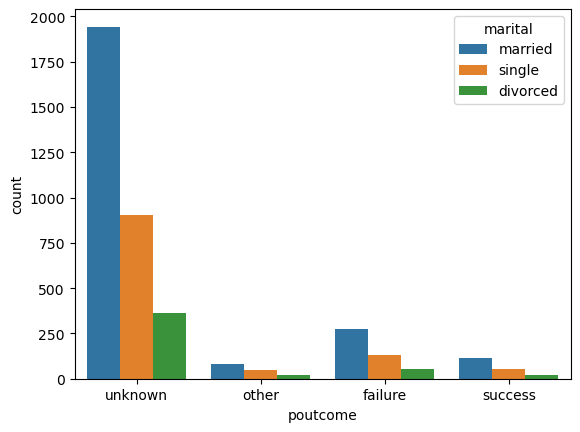

In [6]:
#Checking the distribution of Marital Status with respect to the previous outcomes
sns.countplot(x='poutcome', data=custData, hue = 'marital')

<Axes: xlabel='poutcome', ylabel='count'>

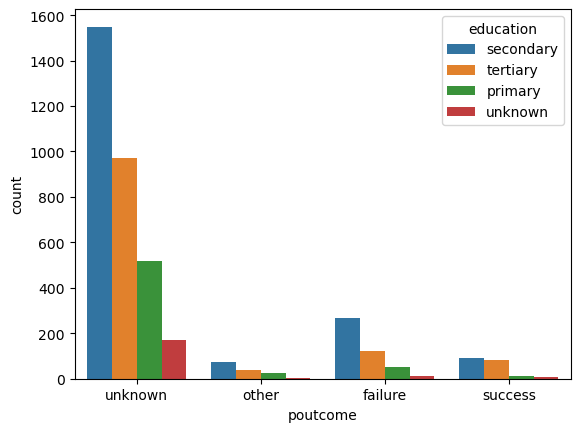

In [7]:
#Checking the distribution of education with respect to the previous outcomes
sns.countplot(x='poutcome', data=custData, hue = 'education')

<Axes: xlabel='poutcome', ylabel='count'>

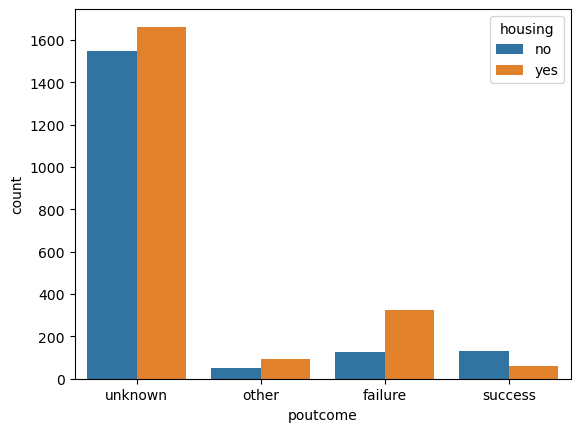

In [8]:
#Checking the distribution of housing loan with respect to the previous outcomes
sns.countplot(x='poutcome', data=custData, hue = 'housing')

In [9]:
#The database consists of various Categorical data, thus, converting categorical data into numeric data

#As only success is important for our analysis, converting all the other values as 0 and success as 1
poutcome_map = {
    'unknown' : 0,
    'failure' : 0,
    'other' : 0,
    'success' : 1
}
poutcome_data = custData['poutcome'].map(poutcome_map)

custData['poutcome_num'] = poutcome_data

#As yes has more weightage yes =1 and no =0
default_map = {
    'no' : 0,
    'yes' : 1
}
default_data = custData['default'].map(default_map)

custData['default_num'] = default_data


housing_map = {
    'no' : 0,
    'yes' : 1
}
housing_data = custData['housing'].map(housing_map)

custData['housing_num'] = housing_data



loan_map = {
    'no' : 0,
    'yes' : 1
}
loan_data = custData['loan'].map(loan_map)

custData['loan_num'] = loan_data


y_map = {
    'no' : 0,
    'yes' : 1
}
y_data = custData['y'].map(y_map)

custData['y_num'] = y_data


print(custData.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'poutcome_num', 'default_num', 'housing_num',
       'loan_num', 'y_num'],
      dtype='object')


In [10]:
#Converting the categorical values of Job into a numerical values using get dummies
#Segregating the 6 top performing jobs with the others
counts = custData.job.value_counts()
limit = 200

In [11]:
repl = counts[counts <= limit].index
custData_job = pd.get_dummies(custData['job'].replace(repl, 'others'))
custData_job = custData_job.drop(['others'], axis = 1)
print(custData_job)

      admin.  blue-collar  management  retired  services  technician
0          0            0           0        0         0           1
1          0            0           0        0         1           0
2          0            0           0        0         0           0
3          0            0           0        1         0           0
4          0            0           1        0         0           0
...      ...          ...         ...      ...       ...         ...
3995       1            0           0        0         0           0
3996       0            0           0        1         0           0
3997       0            1           0        0         0           0
3998       0            0           0        0         0           1
3999       0            0           1        0         0           0

[4000 rows x 6 columns]


In [12]:
#Converting the other categorical variables into numeric using one-hot-encoder 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first' ,sparse = False)

In [13]:
custData_marital = ohe.fit_transform(custData[['marital']])
custData_marital_df = pd.DataFrame(custData_marital, columns = ['marital_married', 'marital_single'])

print(custData_marital_df)

      marital_married  marital_single
0                 1.0             0.0
1                 0.0             1.0
2                 0.0             0.0
3                 1.0             0.0
4                 1.0             0.0
...               ...             ...
3995              0.0             1.0
3996              1.0             0.0
3997              0.0             1.0
3998              1.0             0.0
3999              1.0             0.0

[4000 rows x 2 columns]


D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
custData.education.value_counts()

custData_education = ohe.fit_transform(custData[['education']])
custData_education_df = pd.DataFrame(custData_education, columns = ['education_Secondary', 'education_tertiary', 'education_unknown'])

print(custData_education_df)

      education_Secondary  education_tertiary  education_unknown
0                     1.0                 0.0                0.0
1                     1.0                 0.0                0.0
2                     0.0                 1.0                0.0
3                     0.0                 1.0                0.0
4                     0.0                 0.0                0.0
...                   ...                 ...                ...
3995                  1.0                 0.0                0.0
3996                  1.0                 0.0                0.0
3997                  1.0                 0.0                0.0
3998                  1.0                 0.0                0.0
3999                  0.0                 1.0                0.0

[4000 rows x 3 columns]


D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
custData_contact = ohe.fit_transform(custData[['contact']])
custData_contact_df = pd.DataFrame(custData_contact, columns = ['contact_telephone', 'contact_unknown'])

print(custData_contact_df)

      contact_telephone  contact_unknown
0                   0.0              0.0
1                   0.0              0.0
2                   0.0              0.0
3                   0.0              0.0
4                   1.0              0.0
...                 ...              ...
3995                0.0              1.0
3996                0.0              0.0
3997                0.0              0.0
3998                0.0              1.0
3999                0.0              0.0

[4000 rows x 2 columns]


D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
#Merging the Transformed Job data with the dataset
custDataTransformed = custData.join(custData_job)
print(custDataTransformed)

custDataTransformed.head()

      age          job   marital  education default  balance housing loan  \
0      42   technician   married  secondary      no       27      no   no   
1      28     services    single  secondary      no      230     yes  yes   
2      52    housemaid  divorced   tertiary      no     4306      no   no   
3      70      retired   married   tertiary      no       44      no   no   
4      50   management   married    primary      no      313      no   no   
...   ...          ...       ...        ...     ...      ...     ...  ...   
3995   31       admin.    single  secondary      no      358     yes   no   
3996   60      retired   married  secondary      no      975      no   no   
3997   21  blue-collar    single  secondary      no     1385     yes   no   
3998   49   technician   married  secondary      no     6050     yes   no   
3999   37   management   married   tertiary      no     6014     yes   no   

        contact  day  ...  default_num  housing_num  loan_num  y_num admin.

,age,job,marital,education,default,balance,housing,loan,contact,day,...,default_num,housing_num,loan_num,y_num,admin.,blue-collar,management,retired,services,technician
0,42,technician,married,secondary,no,27,no,no,cellular,14,...,0,0,0,0,0,0,0,0,0,1
1,28,services,single,secondary,no,230,yes,yes,cellular,17,...,0,1,1,0,0,0,0,0,1,0
2,52,housemaid,divorced,tertiary,no,4306,no,no,cellular,22,...,0,0,0,0,0,0,0,0,0,0
3,70,retired,married,tertiary,no,44,no,no,cellular,18,...,0,0,0,1,0,0,0,1,0,0
4,50,management,married,primary,no,313,no,no,telephone,14,...,0,0,0,1,0,0,1,0,0,0


In [17]:
#Merging the Transformed marital data with the dataset
custDataTransformed = custDataTransformed.join(custData_marital_df)
print(custDataTransformed)

custDataTransformed.head()
print(custDataTransformed.columns)

      age          job   marital  education default  balance housing loan  \
0      42   technician   married  secondary      no       27      no   no   
1      28     services    single  secondary      no      230     yes  yes   
2      52    housemaid  divorced   tertiary      no     4306      no   no   
3      70      retired   married   tertiary      no       44      no   no   
4      50   management   married    primary      no      313      no   no   
...   ...          ...       ...        ...     ...      ...     ...  ...   
3995   31       admin.    single  secondary      no      358     yes   no   
3996   60      retired   married  secondary      no      975      no   no   
3997   21  blue-collar    single  secondary      no     1385     yes   no   
3998   49   technician   married  secondary      no     6050     yes   no   
3999   37   management   married   tertiary      no     6014     yes   no   

        contact  day  ...  loan_num  y_num  admin.  blue-collar management 

In [18]:
#Merging the Transformed education data with the dataset
custDataTransformed = custDataTransformed.join(custData_education_df)
print(custDataTransformed)

custDataTransformed.head()
custDataTransformed.columns

      age          job   marital  education default  balance housing loan  \
0      42   technician   married  secondary      no       27      no   no   
1      28     services    single  secondary      no      230     yes  yes   
2      52    housemaid  divorced   tertiary      no     4306      no   no   
3      70      retired   married   tertiary      no       44      no   no   
4      50   management   married    primary      no      313      no   no   
...   ...          ...       ...        ...     ...      ...     ...  ...   
3995   31       admin.    single  secondary      no      358     yes   no   
3996   60      retired   married  secondary      no      975      no   no   
3997   21  blue-collar    single  secondary      no     1385     yes   no   
3998   49   technician   married  secondary      no     6050     yes   no   
3999   37   management   married   tertiary      no     6014     yes   no   

        contact  day  ...  blue-collar  management  retired  services  \
0 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'poutcome_num', 'default_num', 'housing_num',
       'loan_num', 'y_num', 'admin.', 'blue-collar', 'management', 'retired',
       'services', 'technician', 'marital_married', 'marital_single',
       'education_Secondary', 'education_tertiary', 'education_unknown'],
      dtype='object')

In [19]:
custDataTransformed = custDataTransformed.join(custData_contact_df)
print(custDataTransformed)

      age          job   marital  education default  balance housing loan  \
0      42   technician   married  secondary      no       27      no   no   
1      28     services    single  secondary      no      230     yes  yes   
2      52    housemaid  divorced   tertiary      no     4306      no   no   
3      70      retired   married   tertiary      no       44      no   no   
4      50   management   married    primary      no      313      no   no   
...   ...          ...       ...        ...     ...      ...     ...  ...   
3995   31       admin.    single  secondary      no      358     yes   no   
3996   60      retired   married  secondary      no      975      no   no   
3997   21  blue-collar    single  secondary      no     1385     yes   no   
3998   49   technician   married  secondary      no     6050     yes   no   
3999   37   management   married   tertiary      no     6014     yes   no   

        contact  day  ...  retired  services  technician  marital_married  

<Axes: >

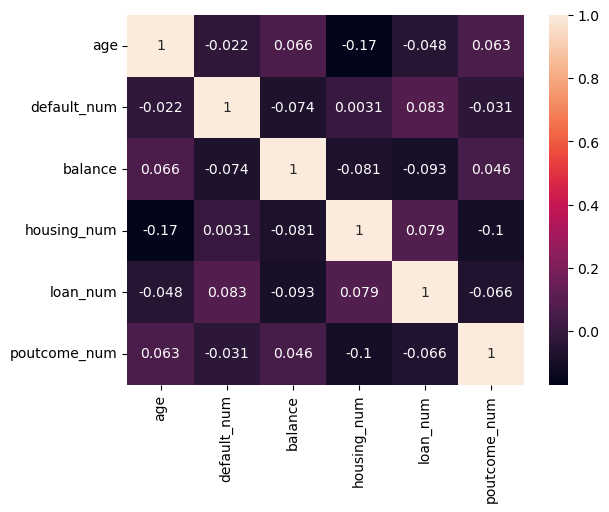

In [20]:
#Finding Correlation of variables with poutcome
custDataTransformed.columns

dataForCorr = custDataTransformed[['age', 'default_num', 'balance', 'housing_num', 'loan_num','poutcome_num']]
sns.heatmap(dataForCorr.corr(), annot = True)

<Axes: >

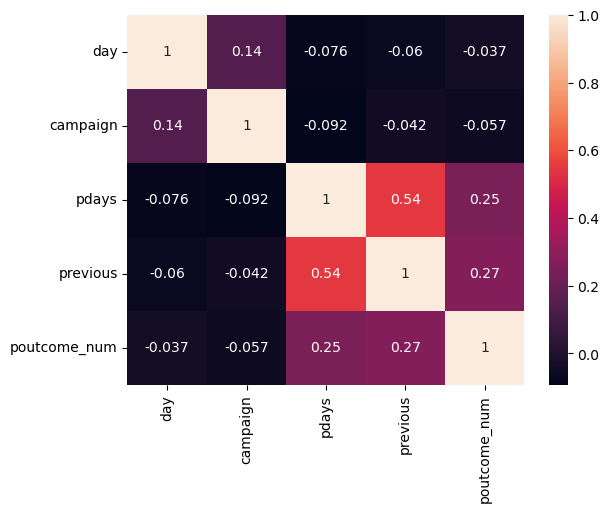

In [21]:
dataForCorr = custDataTransformed[['day', 'campaign', 'pdays', 'previous', 'poutcome_num']]
sns.heatmap(dataForCorr.corr(), annot = True)

<Axes: >

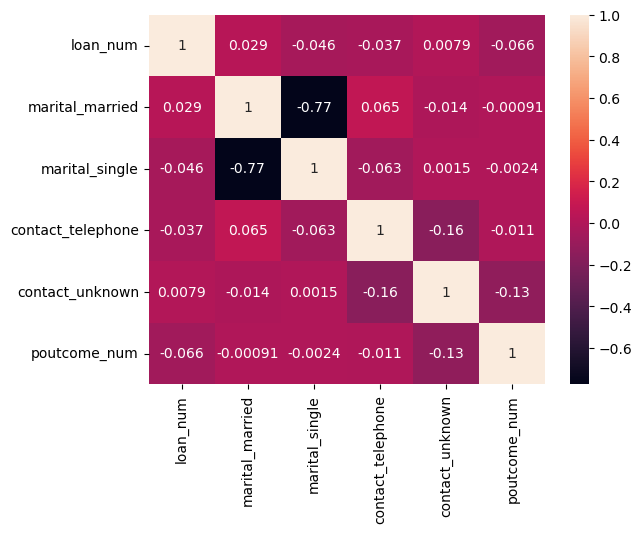

In [22]:
dataForCorr = custDataTransformed[['loan_num', 'marital_married', 'marital_single', 'contact_telephone', 'contact_unknown','poutcome_num']]
sns.heatmap(dataForCorr.corr(), annot = True)

<Axes: >

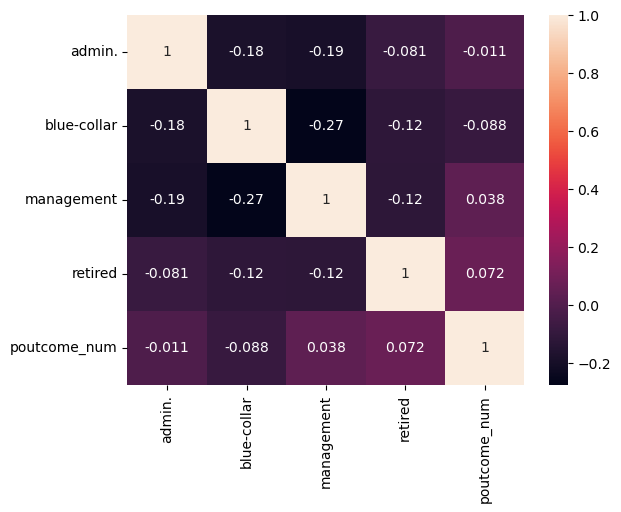

In [23]:
dataForCorr = custDataTransformed[['admin.','blue-collar', 'management','retired','poutcome_num']]
sns.heatmap(dataForCorr.corr(), annot = True)

<Axes: >

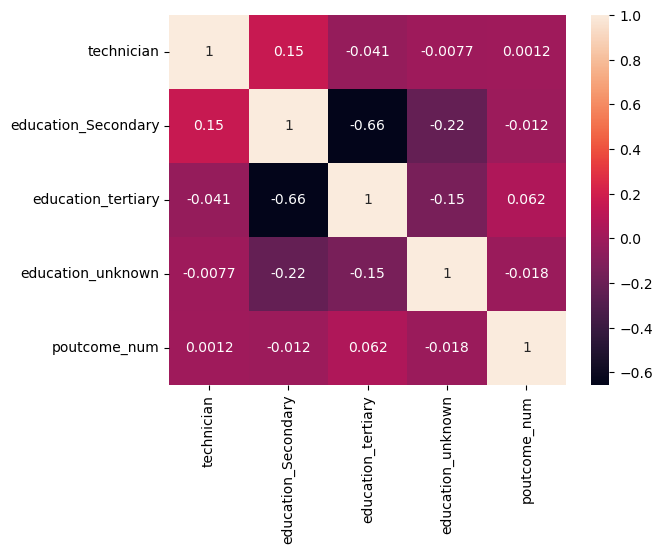

In [24]:
dataForCorr = custDataTransformed[['technician', 'education_Secondary', 'education_tertiary', 'education_unknown','poutcome_num']]
sns.heatmap(dataForCorr.corr(), annot = True)

In [25]:
#Populating input and output variables
#custDataTransformed.columns
X = custDataTransformed.drop(['job', 'marital', 'default', 'education', 'housing', 'loan', 'contact', 'duration', 'poutcome', 'y', 'y_num'], axis =1)
y = custDataTransformed['y_num']



In [26]:
#Implementing Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
#Splitting the data in Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [28]:
dtc = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)

In [29]:
print(classification_report(y_test, dtc_predict))
print('\n')
print(confusion_matrix(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1029
           1       0.74      0.23      0.36       291

    accuracy                           0.81      1320
   macro avg       0.78      0.61      0.62      1320
weighted avg       0.80      0.81      0.77      1320



[[1005   24]
 [ 223   68]]


In [30]:
from sklearn import tree
feature_names = X_test.columns

[Text(0.6, 0.8333333333333334, 'poutcome_num <= 0.5\ngini = 0.331\nsamples = 2680\nvalue = [2120, 560]'),
 Text(0.4, 0.5, 'age <= 60.5\ngini = 0.293\nsamples = 2558\nvalue = [2101, 457]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.278\nsamples = 2489\nvalue = [2073, 416]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.482\nsamples = 69\nvalue = [28, 41]'),
 Text(0.8, 0.5, 'gini = 0.263\nsamples = 122\nvalue = [19, 103]')]

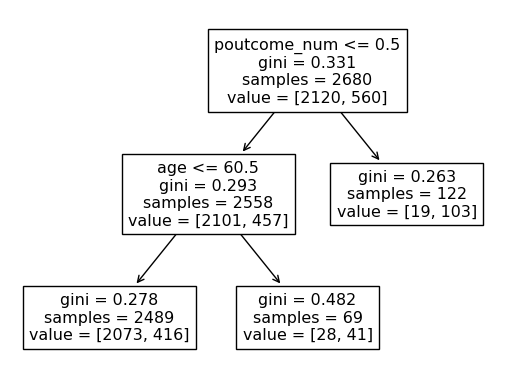

In [31]:
tree.plot_tree(dtc, feature_names = feature_names) 

In [32]:
#Performing Decision Tree Classification using Historical variables only
#custDataTransformed.columns
X_newdt = custDataTransformed[['age', 'blue-collar', 'management', 'admin.', 'retired', 'services', 'technician', 'education_Secondary', 'education_tertiary', 'education_unknown','poutcome_num']]
y_newdt = custDataTransformed['y_num']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_newdt, y_newdt, test_size = 0.33)

In [34]:
dtc_new = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
dtc_new.fit(X_train, y_train)
predict = dtc_new.predict(X_test)

In [35]:
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1042
           1       0.74      0.24      0.36       278

    accuracy                           0.82      1320
   macro avg       0.79      0.61      0.63      1320
weighted avg       0.81      0.82      0.78      1320

[[1019   23]
 [ 211   67]]


[Text(0.6, 0.8333333333333334, 'technician <= 0.5\ngini = 0.331\nsamples = 2680\nvalue = [2120, 560]'),
 Text(0.4, 0.5, 'age <= 60.5\ngini = 0.293\nsamples = 2558\nvalue = [2101, 457]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.278\nsamples = 2489\nvalue = [2073, 416]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.482\nsamples = 69\nvalue = [28, 41]'),
 Text(0.8, 0.5, 'gini = 0.263\nsamples = 122\nvalue = [19, 103]')]

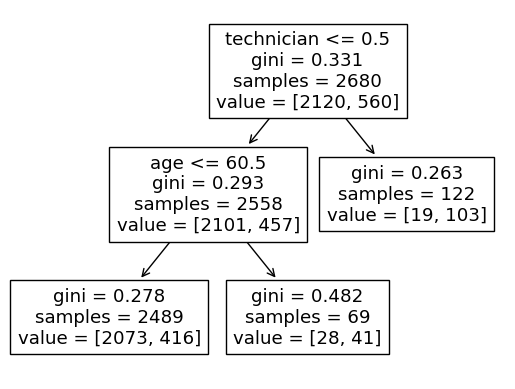

In [36]:
feature_names = X_test.columns
tree.plot_tree(dtc, feature_names = feature_names) 

In [37]:
#Implementing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators = 3, criterion = 'gini', max_depth = 3, min_samples_leaf =1 )

In [39]:
X = custDataTransformed.drop(['job', 'marital', 'default', 'education', 'housing', 'loan', 'contact', 'duration', 'poutcome', 'y', 'y_num'], axis =1)
y = custDataTransformed['y_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [40]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=3)

In [41]:
rfc_prediction = rfc.predict(X_test)

In [42]:
print(classification_report(y_test, rfc_prediction))
print(confusion_matrix(y_test, rfc_prediction))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1037
           1       0.87      0.17      0.28       283

    accuracy                           0.82      1320
   macro avg       0.84      0.58      0.59      1320
weighted avg       0.83      0.82      0.76      1320

[[1030    7]
 [ 236   47]]


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression(penalty = 'l2', solver = 'saga')

In [45]:
X = custDataTransformed.drop(['job', 'marital', 'default', 'education', 'housing', 'loan', 'contact', 'duration', 'poutcome', 'y', 'y_num'], axis =1)
y = custDataTransformed['y_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [46]:
lr.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [47]:
lr_prediction = lr.predict(X_test)

In [48]:
print(classification_report(y_test, lr_prediction))
print(confusion_matrix(y_test, lr_prediction))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88      1035
           1       0.20      0.01      0.01       285

    accuracy                           0.78      1320
   macro avg       0.49      0.50      0.44      1320
weighted avg       0.66      0.78      0.69      1320

[[1027    8]
 [ 283    2]]


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knc = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform', algorithm = 'auto')

In [51]:
X = custDataTransformed.drop(['job', 'marital', 'default', 'education', 'housing', 'loan', 'contact', 'duration', 'poutcome', 'y', 'y_num'], axis =1)
y = custDataTransformed['y_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [52]:
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [53]:
knc_predict = knc.predict(X_test)

In [54]:
print(confusion_matrix(y_test, knc_predict))
print(classification_report(y_test, knc_predict))

[[1030   19]
 [ 240   31]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1049
           1       0.62      0.11      0.19       271

    accuracy                           0.80      1320
   macro avg       0.72      0.55      0.54      1320
weighted avg       0.77      0.80      0.75      1320

